# Programming for Data Analysis Project - 2018

## 1. Introduction

The goal of this project is to simulate a dataset based on available summary statistics and known distributions. I will create a dataset of 1000 Irish people across 6 variables: gender, income level, alcohol consumption, body weight, BMI and salary. 

Obesity is a major problem in Ireland and appears to be strongly correlated with income. Despite my initial beliefs, it appears that, though alcohol consumption may be correlated with negative health affects, it has no or a weak correlation wih obesity. 

I will first investigate the issues of **obesity** and **alcohol consumption** in more detail as my dataset will be based on these factors. 

The types of variables that i will generate will be looked at next, specifically two **categorical** and four **numerical" variables. 

The six variables: **gender**, **income level**, **alcohol consumption**, **salary**, **body weight** and **BMI** will then be discussed separately in more detail. I will introduce the core statistics and demonstrate how to create the variables. The **final dataset** will them be created. 

I will finally introduce the **central limit theorem** and demonstrate how to create an accurately **correlated dataset.** 



It is important to run the below cell first as it loads up the various Python libraries i will use to generate the data. If you see errors further down the notebook, rerun this cell.

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.linalg import cholesky

## 2. Obesity

Obesity is a major health concern for Ireland as it is projected that 90% of Irish adults will be overweight by 2030 (1). 
Obesity can lead to an increase in many health problems, such as high blood pressure and diabetes (2). The HSE claim that obesity in adults over 40 can shorten lifespans by 6 - 7 years (3).

In their **A Healthy Weight for Ireland: Obesity Policy and Action Plan 2016 - 2025**, the Government estimates that the annual cost of obesity in Ireland is €1.13 Billion (2). 

The **Irish Heart Foundation** and **ESRI** note that obesity is more prevalent in children and adults from lower socio-economic backgrounds (4)(5). 

- (1) https://www.rte.ie/lifestyle/living/2016/0914/816492-does-ireland-need-a-sugar-tax/
- (2) https://www.hse.ie/eng/health/az/o/obesity/preventing-obesity.html
- (3) https://www.healthpro.ie/blog/article/a-healthy-weight-for-ireland
- (4) http://irishheart.ie/wp-content/uploads/2016/12/final__reducing_obesity_and_future_health_costs__ihf_and_sji_2015.pdf
- (5)https://www.esri.ie/growing-up-in-ireland/

## 3. Alcohol Consumption

Surprisingly, there appears to be an inconclusive relationship between alcohol consumption and weight gain. A 2015 review of the latest evidence notes that the evidence in conflicting, but suggested that Alchol consumption may contribute to weight gain in some individuals (1). An Australian study found that there may be a small positive correlation between alcohol consumption and weight gain in men, but not in women (2). 

Evidence from the UK (3) and USA (4), appear to suggest that their is a positive relationship between alcohol consumption and income. Wealthier people tend to drink more than those on low incomes.  

- (1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4338356/
- (2) https://www.betterhealth.vic.gov.au/health/HealthyLiving/Alcohol-and-weight-gain
- (3) http://www.ias.org.uk/Alcohol-knowledge-centre/Socioeconomic-groups.aspx
- (4) https://news.gallup.com/poll/184358/drinking-highest-among-educated-upper-income-americans.aspx


## 4. Variables

As stated earlier, i will create 1000 subjects across six different variables: Two **categorical** variables and three **numerical** variables.

I will now introduce the types of variables in more detail

### 4.1 Categorical Variables

Categorical or nominal variables are non-numeric variables which represent categories, such as colors, nationalities, names etc. They can, however, be transformed by representing them with numerical values for ease of analysis 

#### 4.1.1 Gender

Gender is a binary discrete variable: A binary variable has only two levels, however there is no natural order 

#### 4.1.2  Income Level 

An ordinal variable is a categorical variable with a natural order. The Likert Scale, where you rate something from dislike, somewhat dislike, neutral, somewhat like and like, is an example of ordinal data. 

While there is a natural order and they can be ranked, unlike numerical data, you cannot quantify the differences between each of the levels. One cannot say that someone who is neutral likes something exactly 4 times more than someone who strongly dislikes it.

### 4. 2 Numerical variables

#### 4.2.1 Alcohol Consumption, BMI, Human Weight and Income in Euros

There are four continuous variables in this study: alcohol consumption, BMI, body weight and income in Euros. Continuous variables can take an infinite number of values. A person's weight could theoretically be calculated to an infinite or close to infinite precession. 

Interval variables are numerical variables without infinite potential values. The CAO leaving Certificate points scale is an example of interval data. One could get one or two points; not 1.5936764 points. There are no interval data in this project. 

## 5. The Data

In this section, we will look at each of the actual variables in detail and generate them for our dataset. 

### 5.1 Gender

Gender is a binary categorical variable with two levels: male and female. I will represent the two options as numbers, males: 0 and females: 1. 

The CSO found in the 2016 census that the gender ration was 97.8 males for every 100 females (1). In this dataset we will then assume that there are an equal number of men and women. 

A list is created and filled with 500 male and 500 female values. This is then converted into a Pandas Dataframe. 

- (1) https://www.rte.ie/lifestyle/living/2017/0407/866094-the-2016-census-everything-you-need-to-know/

In [64]:
gender = [] # empty list created
for i in range(500): # iterates 500 times
    gender.append(0) # a male and female is added on each iteration
    gender.append(1)
    
gender = pd.DataFrame(gender) # List converted to dataset
gender.columns = ['Gender']


The below bar chart shows that there is an equal amount of men and women. 

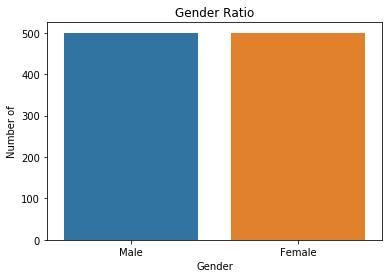

In [65]:
sns.countplot(x="Gender", data=gender)
bars = ('Male', 'Female')
plt.title('Gender Ratio')
plt.xlabel('Gender')
plt.ylabel('Number of')
y_pos = np.arange(2)
plt.xticks(y_pos, bars) # The bars are named after the two levels of the categorical variable: https://python-graph-gallery.com/4-add-title-and-axis-label/

plt.show()


The gender dataframe is split in two to create separate male and female dataframes. Subsequent variables will be created for each gender separately and added to the male and female dataframes below. 

In [66]:
male = gender[gender['Gender'] == 0] # All '0' values are put into a new dataframe called male

In [67]:
female= gender[gender['Gender'] == 1]


In [68]:
male = male.reset_index(drop=True)
female = female.reset_index(drop=True) # resets the index for both dataframes so they start from 1.
male.columns = ['male']
female.columns = ['female']



### 5. 2 Income Level

In this section, i will create the second categorical variable: income level. This will be an ordinal variable and will rank Irish peoples' gross ncome levels from lowest to highest. 

The data comes from the CSO and shows 21 income levels with the frequency of earners at each level. 

In [69]:
income_data = pd.read_csv("https://raw.githubusercontent.com/dermotkel/programming-project/master/gross_income.csv", header=None) 
#The datafile is loaded into the notebook

In [70]:
income_data.columns = ["Income Level", "Earners"] 
# columns are added showing the rank and the quantity of earners at each level.
income_data.head()


,Income Level,Earners
0,"Under 10,000",426578
1,"10,000 to 12,000",83338
2,"12,000 to 15,000",127607
3,"15,000 to 17,000",85967
4,"17,000 to 20,000",132928


The below pie chart is crowed, but clearly shows that the percentage of earners in each level tends to decrease dramatically one you go above €60,000.

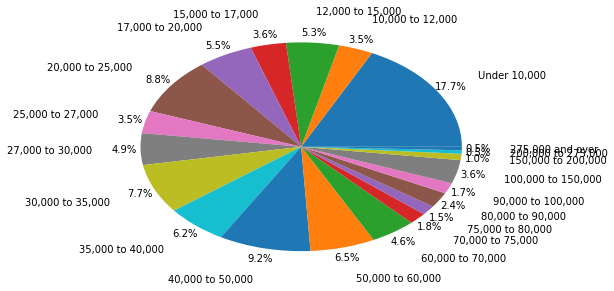

In [71]:
plt.pie(income_data['Earners'], labels=income_data['Income Level'], autopct='%1.1f%%', labeldistance=1.3, pctdistance=1.1, radius = 1.2)
plt.show()

We have the frequency of people in each level of the ordinal variable, but we need to find the proportion. Firstly, we will sum the Earners column. 

In [72]:
y = np.sum(income_data['Earners'])


We will now create a new list of the proportions by dividing the frequency in each variable by the sum. 

In [73]:
new_list = []
for i in income_data['Earners']:
    x = i / y
    new_list.append(x)

The list is rounded and added as a new column in the dataframe called proportion. 

In [74]:
round_list = []
for i in new_list:
    x = round(i, 2)
    round_list.append(x)

    new_df = pd.DataFrame(round_list)
new_df.columns = ["Proportion"]

The ordinal datset with the new proportion column can be seen below:

In [75]:
Income_final = income_data.join(new_df)
Income_final.head()


,Income Level,Earners,Proportion
0,"Under 10,000",426578,0.18
1,"10,000 to 12,000",83338,0.03
2,"12,000 to 15,000",127607,0.05
3,"15,000 to 17,000",85967,0.04
4,"17,000 to 20,000",132928,0.06


numpy random.choice is used to choose 500 values from 0 to 20 (the 21 income levels) and create a dataframe. The numbers are chosen based on the probability of these income levels calculated above. Therefore, we should get a dataset with a representative distribution of income levels 

The CSO data does not easily differentiate based on gender, therefore we will create an identical dataset for males and females. 

In [76]:
probs = np.array(new_list)
male_income_level = pd.DataFrame(np.random.choice(21, 500, p=probs))
female_income_level = pd.DataFrame(np.random.choice(21, 500, p=probs))
male_income_level.columns = ['Income']
female_income_level.columns = ['Income']


### 5.3 Alcohol Consumption

We will now begin looking at our four continuous variables and begin with alcohol consumption. 

Alcohol consumption is generally best modeled with a positively skewed gamma distribution (1). The gamam distribution takes two parameters: shape and scale. A study in *Popular Health Metrics* in 2012 gives the shape and scale parameters for alcohol consumption in grams per day for males and females in Ireland (2). 

We can use these parameters to create a dataset on alcohol consumption for Irish males and females. The female dataset is created below. As you can see, the gamma distribution is positively skewed. The largest group of women appear to have low consumption and it falls in an exponential fashion.

The mean of female consumption is less than half that of male consumption.

- (1) https://journals.sagepub.com/doi/pdf/10.1177/0731121416683274
- (2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3352241/

In [77]:
# Female dataset
falc = np.random.gamma(0.91, 15.55, 500) # shape = 0.91, scale = 15.55, 500 variables created
falc = pd.DataFrame(falc)
falc.columns = ['Alcohol']
print(np.mean(falc))

Alcohol    13.790847
dtype: float64


C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


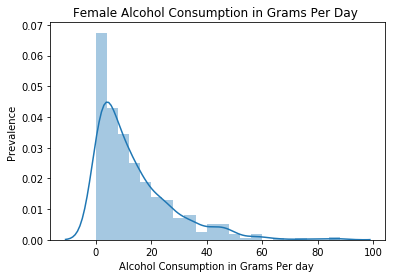

The mean female alcohol consumption in grams per day is Alcohol    13.790847
dtype: float64


In [78]:
sns.distplot(falc)
plt.title('Female Alcohol Consumption in Grams Per Day ')
plt.xlabel('Alcohol Consumption in Grams Per day ')
plt.ylabel('Prevalence')
falc.mean()
plt.show()
print("The mean female alcohol consumption in grams per day is", np.mean(falc))

In [79]:
malc = np.random.gamma(0.98, 38.57, 500)
malc = pd.DataFrame(malc)
malc.columns = ['Alcohol']

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


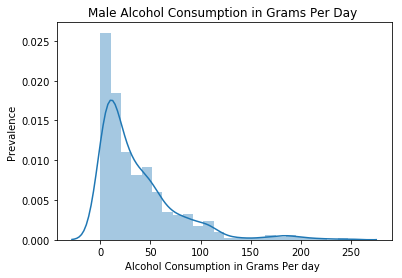

The mean male alcohol consumption in grams per day is Alcohol    37.481468
dtype: float64


In [80]:
sns.distplot(malc)
plt.title('Male Alcohol Consumption in Grams Per Day ')
plt.xlabel('Alcohol Consumption in Grams Per day ')
plt.ylabel('Prevalence')
plt.show()
print("The mean male alcohol consumption in grams per day is", np.mean(malc))

### 5.4 Average Salary

We have already created an ordinal variable on income levels, but now we will create a continuous income variable. Income is not normally distributed and tends to have a log-normal, Weibul or gamma distribution (1). Like the alcohol consumption above, we will create the data using a gamma distribution (2). 

Income distribution tends to be positively skewed. Most people are placed in the lower left side of the graph and exponentially less people earn more than this. We saw in the pie chart of the ordinal data earlier that the number of earners fell as the income level increased. 

*Morgan Mckinley* reported that the average Irish male salary was €55,500 and the average Irish female salary was €46,500 (3). 
It was not possible to find actual data on salary standard deviation (SD) and i will assume an SD of 15000 for both males and females. 

As we saw with the alcohol consumption above, the gamma distribution requires a shape and scale parameter. Fortunately, a formula to estimate the shape and scale from the mean and SD is available at *rocscience* (4). The male and female parameters are calculated below using these formulas. 

- (1) https://www.jstor.org/stable/pdf/1914221.pdf?seq=1#page_scan_tab_contents
- (2) http://www2.physics.umd.edu/~yakovenk/papers/PhysicaA-370-54-2006.pdf
- (3) https://www.morganmckinley.ie/sites/morganmckinley.ie/files/gender_pay_gap_in_ireland_2016.pdf
- (4) https://www.rocscience.com/help/swedge/swedge/Gamma_Distribution.htm

We will begin by creating the male dataset first and then the female. The shape and scale parameters are calculated first, then the dataset is created using the numpy gamma function.

In [81]:
# Male shape and scale parameters calculated. 

mSD = 15000
mmean = 55500

mshape = (mmean/mSD)**2

mscale = (mSD**2)/mmean
print("Male Shape:", mshape)
print("Male Scale:", mscale)



Male Shape: 13.690000000000001
Male Scale: 4054.054054054054


The male average salary dataset is created below based on the gamma parameters calculated above. There does appear to be a slight positive skew as the salary increases. 

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


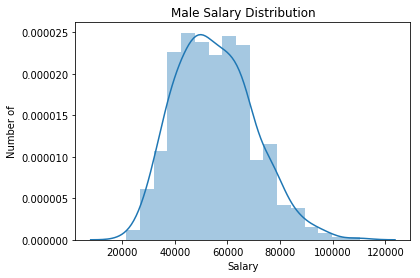

In [82]:
minc = pd.DataFrame(np.random.gamma(mshape, mscale, 500))
sns.distplot(minc)
plt.title('Male Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of')
plt.show()
minc.columns = ['Salary']

In [83]:
# Female shape and scale parameters calculated. 

fSD = 15000
fmean = 46500

fshape = (fmean/fSD)**2

fscale = (fSD**2)/fmean
print("Female Shape:", fshape)
print("Female Scale:", fscale)

Female Shape: 9.610000000000001
Female Scale: 4838.709677419355


C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


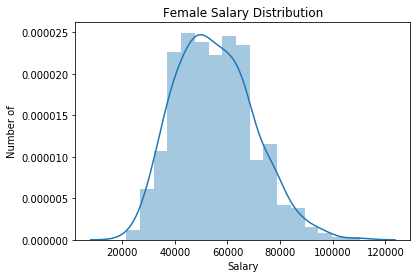

In [84]:
finc = pd.DataFrame(np.random.gamma(fshape, fscale, 500))
sns.distplot(minc)
plt.title('Female Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of')
plt.show()
finc.columns = ['Salary']

### 5.5 Human Body Weight

Human body weight, similar to other human characteristics, like height, age etc. tends to be normally distributed (1). However, in reality, body weight may be skewed to the right (2). In this project we will assume a normal distribution. A normal distribution has a peak in the centre and then consistently falls the further one gets from the mean. It has a bell shaped curve.

In order to generate a normally distributed dataset, we need the mean and the SD. The mean Irish male weight in Kg is 88.7 kg and the female weight is 73.8 kg (3). I could not find a reliable SD statistics, so will assume an SD of 15 for males and females. 	

Below, i calculate the male and female body weight datasets using numpy random normal. 

- (1) http://www.usablestats.com/lessons/normal
- (2) https://www.ncbi.nlm.nih.gov/pubmed/11673780
- (3) https://www.worlddata.info/average-bodyheight.php

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


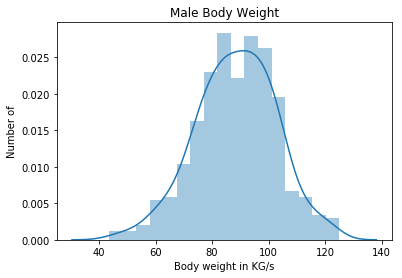

In [85]:
mbweight = pd.DataFrame(np.random.normal(88.7, 15, 500)) # male: mean is 88.7 and standard deviation 15
sns.distplot(mbweight)
plt.title('Male Body Weight')
plt.xlabel('Body weight in KG/s')
plt.ylabel('Number of')
plt.show()
mbweight.columns = ['Weight']


C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


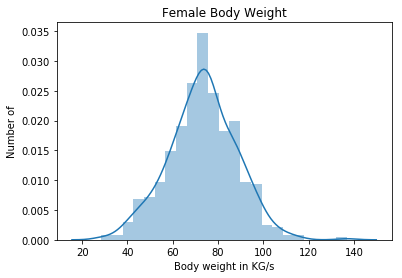

In [86]:
fbweight = pd.DataFrame(np.random.normal(73.8, 15, 500)) # female: mean 73.8 and standard deviation of 15. 
sns.distplot(fbweight)
plt.title('Female Body Weight')
plt.xlabel('Body weight in KG/s')
plt.ylabel('Number of')
plt.show()
fbweight.columns = ['Weight']

### 5.6 BMI

Body Mass Index (BMI) is a metric calculated from height and weight used to measure obesity (1). BMI, like human weight, tends to be normally distributed (2). Again, we need the mean and SD for male and female to create a normally distributed dataset. 

According to a study in *the Lancet* in 2017, Irish BMI in 2016 was 28.095 for males and 27.203 for females (3). A study in the *Journal of Public Health* found in 2011 that the SD of BMI for males was 4.8 and 5.8 for females (4). We will use these in our data creation. 

The male and female BMI datasets are created using numpy random normal below:


- (1) https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm
- (2) https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0063217
- (3) https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(16)31919-5/fulltext
- (4) https://academic.oup.com/jpubhealth/article/38/3/607/2239800


C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


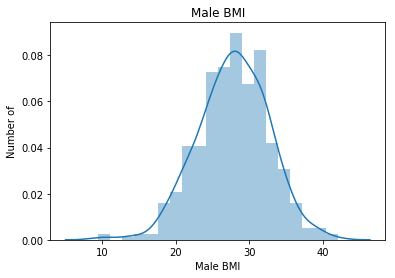

In [87]:
mbmi  = pd.DataFrame(np.random.normal(28.095, 4.8, 500))
sns.distplot(mbmi)
plt.title('Male BMI')
plt.xlabel('Male BMI')
plt.ylabel('Number of')
plt.show()
mbmi.columns = ['BMI']

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


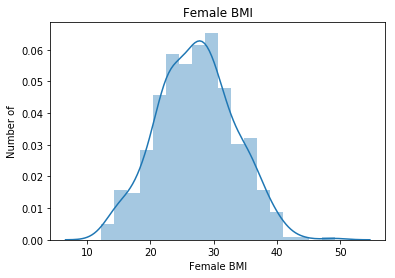

In [88]:
fbmi  = pd.DataFrame(np.random.normal(27.203, 5.8, 500))
sns.distplot(fbmi)
plt.title('Female BMI')
plt.xlabel('Female BMI')
plt.ylabel('Number of')
plt.show()
fbmi.columns = ['BMI']

## 6. Final Dataset

Finally, we will create the male and female datasets. All of the variables above are joined together using Panda's concat function. 

The two datasets are displayed below:

In [89]:
# male dataset
male_combined = pd.concat([male, male_income_level, malc, minc, mbweight, mbmi], axis=1)
male_combined.head()

,male,Income,Alcohol,Salary,Weight,BMI
0,0,10,7.096190,61172.880492,99.549764,30.832018
1,0,5,87.211802,36913.854529,88.028722,17.608782
2,0,17,34.410665,60824.469412,110.695055,26.794960
3,0,10,95.941903,66524.045564,80.939486,27.401560
4,0,0,17.755144,43321.332486,120.886092,28.965593


In [90]:
# female dataset
female_combined = pd.concat([female, female_income_level, falc, finc, fbweight, fbmi], axis=1)
female_combined.head()

,female,Income,Alcohol,Salary,Weight,BMI
0,1,16,3.183722,60649.175161,72.361476,23.643905
1,1,10,11.512380,14584.084791,52.876526,28.655169
2,1,11,66.216199,41450.898796,38.100391,20.649760
3,1,6,18.981820,42040.885029,90.467105,31.049753
4,1,13,0.949608,27274.124721,76.867950,34.541839


## 7. Central Limit Theorem

We have created the datasets, however, we have not correlated them. In order to correlate the variables accurately, we will use numpy random multivariate.

We have seen that the variables are not all normally distributed. However, in reality, when conducting research, you will get a sample of the population. If you get the get a sample of the population, calculate its average and repeat the process many times, you will get a sample dataset that has a similar mean to the population. It will also be in a bell shape curve. 

We see the gamma distribution of female alcohol consumption below. We then use numpy choice to take a random sample from this dataset. The new dataset has the same mean, but s normally distributed. 

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


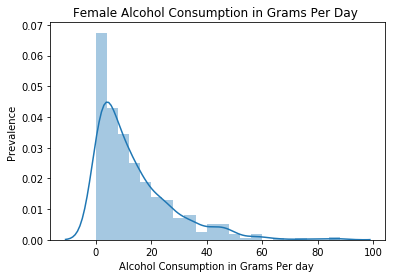

The mean female alcohol consumption in grams per day is Alcohol    13.790847
dtype: float64


In [93]:
sns.distplot(falc)
plt.title('Female Alcohol Consumption in Grams Per Day ')
plt.xlabel('Alcohol Consumption in Grams Per day ')
plt.ylabel('Prevalence')
falc.mean()
plt.show()
print("The mean female alcohol consumption in grams per day is", np.mean(falc))

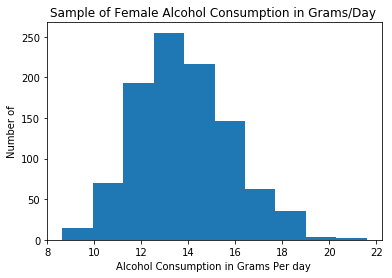

The mean of the female sample is  Alcohol    13.790847
dtype: float64


In [96]:
falcsamp = [] 
for x in range(1000): 
    falcsamp.append(np.mean(np.random.choice(falc['Alcohol'], 50))) # Derived from here: https://www.youtube.com/watch?v=Ecs_JPe9gCM&t=5s
plt.hist(falcsamp)
plt.title('Sample of Female Alcohol Consumption in Grams/Day ')
plt.xlabel('Alcohol Consumption in Grams Per day ')
plt.ylabel('Number of')
plt.show()
print("The mean of the female sample is ", falc.mean())


## 8. Correlated Data

We will now create correlated random samples of our three numerical variables: **Alcohol Consumption**, **Salary** and **body weight**. 

Firstly, we have to get the mean of each of the datasets generated earlier. We will begin with females. 

In [102]:
print("The female alcohol consumption mean is"), np.rint(np.mean(falc))


The female alcohol consumption mean is


(None, Alcohol    14.0
 dtype: float64)

In [103]:
print("The female Income mean is"), np.rint(np.mean(finc))


The female Income mean is


(None, Salary    46418.0
 dtype: float64)

In [31]:
print("The female bodyweight mean is"), np.rint(np.mean(fbweight))

The female bodyweight mean is


(None, Weight    74.0
 dtype: float64)

In [118]:


fmean = [15, 46811, 74] # The means of Alcohol consumption, salary and weight.
fcov = np.array([[1, 0.6, 0.1], # Alcohol consumption is fully correlated with itself '1', strong correlation with income and no correlation with weight for women. 
                [0.6, 1, -0.5], # Salary has a strong negative correlation with weight. Higher salary = weigh less
               [0.1, -0.5, 1]])  

fn = np.random.multivariate_normal(fmean, fcov, 500)
fn = pd.DataFrame(fn)
fn.columns = ['Alcohol','Salary','Body Weight']



The dataset and pairplot are displayed below:

In [119]:
fn.head()

,Alcohol,Salary,Body Weight
0,14.694051,46811.757321,73.870123
1,14.176388,46811.692434,73.515408
2,14.128828,46811.351759,71.436868
3,15.747437,46810.900627,74.572389
4,14.522975,46810.356957,73.364454


The pairplot below shows the positive correlation between alcohol consumption and salary. There is a negative correlation between salary and bodyweight. Alcohol and bodyweight shows no correlation

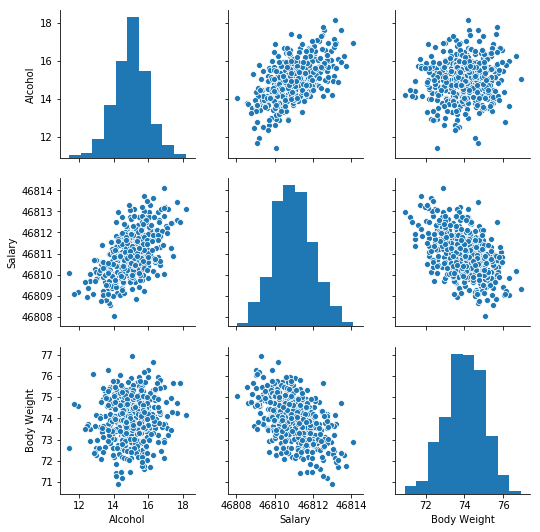

In [120]:
sns.pairplot(fn)

Below, we do the same for males:

In [113]:
print("The male alcohol consumption mean is"), np.rint(np.mean(malc))

The male alcohol consumption mean is


(None, Alcohol    37.0
 dtype: float64)

In [114]:
print("The male Income mean is"), np.rint(np.mean(minc))

The male Income mean is


(None, Salary    55167.0
 dtype: float64)

In [115]:
print("The male bodyweight mean is"), np.rint(np.mean(mbweight))

The male bodyweight mean is


(None, Weight    88.0
 dtype: float64)

In [121]:
mmean = [39, 56089, 89] # The means of Alcohol consumption, salary and weight.
mcov = np.array([[1, 0.6, 0.4], # The only difference is that there may be a stronger correlation between alcohol consumption 
                [0.6, 1, -0.5], # and men as seen earlier.
               [0.4, -0.5, 1]])  

mn = np.random.multivariate_normal(mmean, mcov, 500)
mn = pd.DataFrame(mn)
mn.columns = ['Alcohol','Income','Body Weight']

C:\Users\dermotkel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


In [123]:
mn.head()

,Alcohol,Income,Body Weight
0,40.971856,56090.346919,89.499823
1,40.444620,56090.900303,88.300889
2,39.769752,56088.754234,90.153729
3,38.336177,56088.818074,88.519526
4,39.632693,56087.655664,91.228813


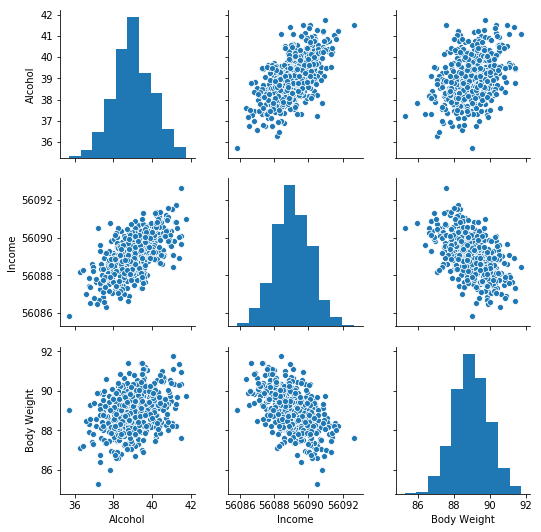

In [122]:
sns.pairplot(mn)

In [45]:
corr_mat = np.array([[1, 0.6],
                    [0.6, 1]])

fin = pd.DataFrame({"Income": female_income_level['Income'], "BMI": fbmi['BMI']})

C:\Users\dermotkel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


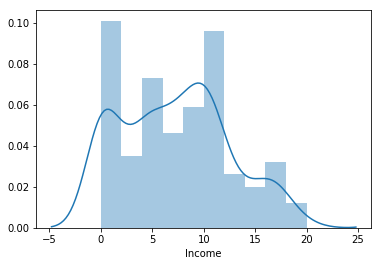

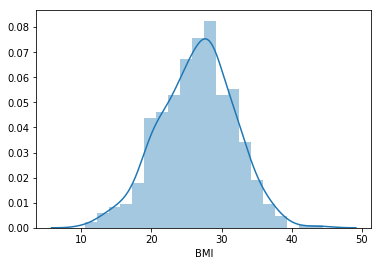

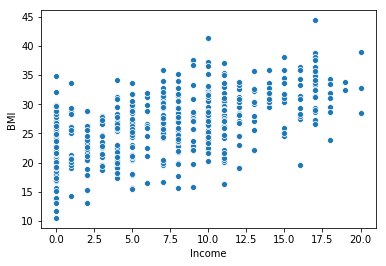

In [46]:
upper_chol = cholesky(corr_mat)

ans = fin @ upper_chol
ans.columns = ['Income', 'BMI']

sns.distplot(ans['Income'])
plt.show()
sns.distplot(ans['BMI'])
plt.show()

sns.scatterplot(x = "Income", y = "BMI", data=ans)

In [187]:
corr_mat = np.array([[1, 0.6],
                    [0.6, 1]])

fin = pd.DataFrame({"Income Level": np.random.choice(21, 500, p=probs), "Male Weight": mbmi['BMI']})